# Stocking Profitable Phone Brands for an Ecommerce Startup

### Introduction

SleekGadgets, a tech startup, wants to venture into selling phones on Jumia, Nigeria's no.1 ecommerce platform. To boost their chances making sales, they need to populate their online store with phones that will sell fast. But they do not know which brands buyers prefer. As a data analyst, I have been brought onboard to extract insight from the data of phones stocked on Jumia and make recommendations on the **top 7 brands**. 

Sales transaction data would have been best for this analysis, but since that is unavailable presently, we'd see what we can infer from this dataset scrapped and already cleaned from Jumia's website.

Let's explore!

# SECTION A: GENERAL EXPLORATION

### Loading the Dataset

In [1]:
import pandas as pd
jumia = pd.read_csv("jumia_clean.csv")
jumia.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,ram,rom,battery,screen
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,3.5,10,4.0,64.0,5000.0,6.2
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",3.8,10,4.0,64.0,3000.0,5.2
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",4.3,99,NaN,NaN,3950.0,5.7
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.0,104,3.0,32.0,NaN,6.3
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",3.9,148,NaN,NaN,3950.0,5.7


### Renaming Columns to Include Units

In [2]:
jumia.columns = ["brand", "current_price_N",
                "old_price_N", "discount_%",
                "description", "ratings",
                "times_reviewed", "ram_gb",
                "rom_gb", "battery_mah",
                "screen_inches"]
jumia.head()

,brand,current_price_N,old_price_N,discount_%,description,ratings,times_reviewed,ram_gb,rom_gb,battery_mah,screen_inches
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,3.5,10,4.0,64.0,5000.0,6.2
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",3.8,10,4.0,64.0,3000.0,5.2
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",4.3,99,NaN,NaN,3950.0,5.7
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.0,104,3.0,32.0,NaN,6.3
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",3.9,148,NaN,NaN,3950.0,5.7


### Exploring the Columns for Data Types and Missing Values

In [3]:
jumia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 11 columns):
brand              508 non-null object
current_price_N    508 non-null int64
old_price_N        508 non-null int64
discount_%         508 non-null int64
description        508 non-null object
ratings            508 non-null float64
times_reviewed     508 non-null int64
ram_gb             467 non-null float64
rom_gb             451 non-null float64
battery_mah        216 non-null float64
screen_inches      441 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 43.8+ KB


### How Many Brands Exist?

In [4]:
jumia["brand"].unique()     #checking for false unique values

array(['Gionee', 'Nokia', 'UMIDIGI', 'Tecno', 'Oukitel', 'Samsung',
       'Leagoo', 'Infinix', 'Cubot', 'Letv', 'Ulefone', 'Blackview',
       'Oneplus', 'Doogee', 'Huawei', 'XIAOMI', 'Leagoo Lead 7',
       'unknown brand', 'Homtom', 'Itel', 'Fero', 'Motorola', 'LG',
       'Sony', 'Elite', 'Oppo', 'Nomu', 'Bontel', 'Unicorn', 'Jodom',
       'AfriOne', 'Swiss', 'Lenovo', 'Gome', 'Desire', 'Vernee',
       'Elephone', 'SOYES', 'Asus', 'Hisense', 'Honor', 'Letv Leeco',
       'Sharp', 'Alcatel', 'Htc', 'Leeco', 'Kismo', 'Arashi', 'Partner',
       'ZTE', 'M Horse', 'Hoot', 'Cool Pad', 'Melrose', 'Blackberry',
       'Sailf'], dtype=object)

Upon observation, we find that there are no false uniques (e.g. htc and HTC) in the brand column. We can go now ahead and count the number of unique brands.

In [5]:
jumia["brand"].nunique()

56

Now we know the number of brands, let's answer the next question:

### Which are the most expensive brands?

To answer this, I created a pivot table showing products count and median `current price_N` for each brand. I chose to use median, instead of average, because one very expensive phone (an outlier) can easily drag up the brand average. But the median is minimally affected by such an outlier and so gives a value that is more representative of the dataset.

In [6]:
brand_count_and_median = jumia.pivot_table(index="brand", values="current_price_N", aggfunc=["count", "median"])
brand_count_and_median.head(10)         #displays the first 10 items on the table

,count,median
,current_price_N,current_price_N
brand,,
AfriOne,1,61000.0
Alcatel,1,49900.0
Arashi,1,96999.0
Asus,3,63990.0
Blackberry,1,92900.0
Blackview,19,69800.0
Bontel,1,17500.0
Cool Pad,1,30490.0


To make this table useful, I first sorted by `current_price_N` from highest to lowest.

In [7]:
brand_count_and_median.sort_values(by=("median","current_price_N"), ascending=False)

,count,median
,current_price_N,current_price_N
brand,,
Oneplus,1,350000.0
Samsung,65,130000.0
Htc,3,100000.0
Arashi,1,96999.0
Blackberry,1,92900.0
Oppo,10,89000.0
Blackview,19,69800.0
Doogee,9,69000.0


The most and least expensive brands are uncommon ones (each has only one product on the site): Oneplus at N350,000 and Kismo at N6,500 (Note- There are cheaper products on the site. However, such brands also have expensive phones that increased the median).

In selecting the most expensive brands, we considered only brands with at least ten products on the site, leaving us with *Samsung, Oppo and Blackview, LG and Huawei* as our top 5.

### Average Prices of Top 5 Most Expensive Brands

In [8]:
jumia.groupby("brand").mean().loc[["Samsung", "Oppo", "Blackview", "LG", "Huawei"], "current_price_N"]

brand
Samsung      157856.338462
Oppo          88255.900000
Blackview     89098.842105
LG            60464.650000
Huawei        84464.638889
Name: current_price_N, dtype: float64

# SECTION B: SELECTING BRAND

But expensive neither means popular nor ideal. The most expensive brands won't necessarily generate the most profit. Back to out question of *Which 7 Brands Should We Stock*, by sorting the above pivot table by `counts`, we now explore:

### Which brands were stocked the most by other sellers?

In [9]:
brand_count_and_median.sort_values(by=("count","current_price_N"), ascending=False).head(10)

,count,median
,current_price_N,current_price_N
brand,,
Samsung,65,130000.0
Gionee,56,49578.5
Nokia,46,35899.5
Huawei,36,67949.5
Tecno,33,55000.0
XIAOMI,30,66879.5
Infinix,23,60590.0
LG,20,67949.5


*Samsung, Gionee, Nokia, Huawei, Tecno* are our top 5 most stocked brands. There is a sense in which a brand might be popular among sellers. Let's now explore most popular brands amongst customers based on `times_reviewed`.


### Which Brands are Popular Amongst Customers?

In [10]:
jumia.groupby("brand").sum()["times_reviewed"].sort_values(ascending=False) #for each brand, this sums up the number of reviews for each product

brand
Gionee           3337
Tecno            1644
Samsung          1570
Nokia            1277
Itel             1023
Oukitel           744
Huawei            729
UMIDIGI           490
Leagoo            459
Infinix           414
Bontel            138
XIAOMI            101
Cubot              96
Letv               84
Blackview          62
Doogee             45
Lenovo             41
LG                 36
unknown brand      28
Ulefone            26
Oppo               16
Sharp              15
Elite              13
Hoot               13
Motorola           12
Vernee             10
Nomu                7
Homtom              7
Fero                6
Sailf               5
Elephone            5
Sony                5
Gome                5
Honor               5
AfriOne             5
Leagoo Lead 7       3
Asus                3
Htc                 3
Swiss               3
Partner             2
Oneplus             2
Letv Leeco          2
Arashi              2
Melrose             2
Hisense             1
Unic

*Gionee, Tecno, Samsung, Nokia, Itel* are the top 5 most popular amongst Jumia customers. Are they popular because they are affordable, offer wider variety or higher discounts?

### Reasons for Popularity Amongst Customers

In [11]:
popular_brands = jumia.pivot_table(index="brand", values=["discount_%","current_price_N"], aggfunc=["mean","count"])
popular_brands.loc[["Gionee","Tecno","Samsung", "Nokia","Itel"]]

mean                      count           
        current_price_N discount_% current_price_N discount_%
brand                                                        
Gionee     60350.910714  30.214286              56         56
Tecno      52864.181818   7.545455              33         33
Samsung   157856.338462  16.200000              65         65
Nokia      49023.260870  26.543478              46         46
Itel       25167.100000   5.450000              20         20

By observation, we find that popular brands offer lots of variety for buyers to surf through. Discount rates range from about 5% to 30% and so doesn't look like it impacts a brand's popularity. 

The popular brands seem to cater for specific income groups / customer segments:
- Itel - Low earners
- Gionee, Tecno, Nokia - Average earners who can afford some luxury
- Samsung - High earners

In addition, we also discover that one thing common among popular brands is that they have phones for every income class: rich and poor. To confirm this, find below the price distribution for each brand.

In [12]:
unique_brands = jumia["brand"].unique()
for brand in unique_brands:
    unique_brands = jumia.loc[jumia["brand"]==brand,"current_price_N"].sort_values(ascending=True)
    print(brand)
    print(unique_brands)
    print('\n')

Gionee
234     24990
38      24999
25      26800
69      26800
80      26800
40      29300
30      29800
109     29800
428     30300
439     34500
61      34990
376     36000
29      36520
5       37350
6       37970
168     38000
406     39500
430     39999
138     42210
392     42250
23      43026
225     44990
420     47000
278     48000
0       48000
461     48000
21      48182
452     48757
299     50400
97      51351
425     51351
76      51351
442     53300
48      53400
107     56000
101     63810
479     65500
403     69000
381     69000
246     69000
374     69900
290     76999
158     78000
319     89900
284     89990
487     89999
313     99000
271     99000
360     99900
204     99900
181     99900
314     99990
207     99990
236    100000
342    139999
417    198888
Name: current_price_N, dtype: int64


Nokia
220      5400
147      6500
312      6500
241      6500
149      6800
211      7000
136      8000
352      9000
280      9000
449      9000
122     10800
351     108

`times_reviewed` tells us how popular a brand is. While `ratings` tell us how satisfied customers were with such purchases. Let's now explore `ratings` to help SleekGadgets decide which phones to stock.

### Which Brands are Most Highly Rated?

First let's explore: are most brands rated as negative (less 3.0), neutral (3.0 to 3.9), or positive (greater than 4.0)?

In [13]:
ratings_category = []  #creating an empty list

for ratings in jumia["ratings"]:               #looping through the ratings column, and based on given conditions,
    if ratings < 3.0:                          #labelling them as negative, positive, or neutral,
        ratings_category.append("Negative")    #and populating the initially empty list with these labels
    elif (ratings >= 3.0 and ratings < 4):
        ratings_category.append("Neutral")
    else:
        ratings_category.append("Positive")

jumia["ratings_category"] = ratings_category   #assigning populated list to a new column
jumia["ratings_category"].value_counts()

Positive    404
Neutral      66
Negative     38
Name: ratings_category, dtype: int64

Now that we know most ratings are positive (404 out of 508), let's explore these positively rated products for the most positively rated brand.

In [14]:
positive_ratings = jumia.loc[jumia["ratings"] >= 4.0]     #filters the dataset for products rated 4.0 and above
positive_ratings.head(3)

,brand,current_price_N,old_price_N,discount_%,description,ratings,times_reviewed,ram_gb,rom_gb,battery_mah,screen_inches,ratings_category
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",4.3,99,NaN,NaN,3950.0,5.7,Positive
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,4.0,104,3.0,32.0,NaN,6.3,Positive
5,Gionee,37350,49990,25,"S11 Lite 5.7-Inch HD (4GB,64GB ROM) Android 7....",4.2,1145,4.0,64.0,NaN,5.7,Positive


In [15]:
positive_ratings["brand"].value_counts()

Samsung          55
Gionee           37
Nokia            34
XIAOMI           29
Tecno            29
Huawei           28
Infinix          20
LG               18
Itel             18
Blackview        16
Oukitel          13
Letv              9
Lenovo            9
Oppo              9
Doogee            8
Ulefone           7
Leagoo            6
UMIDIGI           6
Cubot             6
Vernee            4
unknown brand     4
Fero              3
Motorola          3
Asus              3
Htc               3
Sony              3
Sharp             2
Homtom            2
Honor             2
Elephone          2
Hisense           1
Oneplus           1
Jodom             1
Cool Pad          1
Leagoo Lead 7     1
Nomu              1
Gome              1
Alcatel           1
Leeco             1
Blackberry        1
Desire            1
Swiss             1
Letv Leeco        1
Arashi            1
Melrose           1
ZTE               1
Name: brand, dtype: int64

*Samsung, Gionee, Nokia, Tecno, Xiaomi* are the top most highly rated brand.

### Top 7 Brands (Bringing it all Together)

Now we have explored *number of reviews*, *customer ratings* and *most stocked brands by sellers*, to arrive at seven brands to recommend to SleekGadgets, we would take an intersection of the top brands for each of these popularity indicators.

In [16]:
top10_popular_brands_by_reviews = ["Gionee", "Tecno", "Samsung", "Nokia", "Itel",
                                   "Oukitel", "Huawei", "Umdigi", "Leagoo", "Infinix"]
top10_popular_brands_by_ratings = ["Samsung", "Gionee", "Nokia", "Tecno", "Xiaomi", 
                                   "Huawei", "Infinix", "Itel", "LG", "Blackview"]
top10_popular_brands_by_sellers_stocking = ["Samsung", "Gionee", "Nokia", "Huawei", "Tecno", 
                                            "Xiaomi", "Infinix", "LG", "Itel", "Blackview"]
set(top10_popular_brands_by_reviews) & set(top10_popular_brands_by_ratings) & set(top10_popular_brands_by_sellers_stocking)

{'Gionee', 'Huawei', 'Infinix', 'Itel', 'Nokia', 'Samsung', 'Tecno'}

# SECTION C: SELECTING PRODUCTS BASED ON SPECIFICATIONS

Now we know which brands to stock, we need to recommend specifications for SleekGadgets to look out for, in terms of rom and ram size, screen length and battery capacity. We achieve this by recommending the specifications that are stocked the most.

In [17]:
jumia["ram_gb"].value_counts()

4.0     158
3.0      93
6.0      76
2.0      60
1.0      54
8.0      12
32.0      7
12.0      3
16.0      2
64.0      2
Name: ram_gb, dtype: int64

In [18]:
jumia["rom_gb"].value_counts()

64.0     155
32.0     134
16.0      79
128.0     57
8.0       20
256.0      4
4.0        2
Name: rom_gb, dtype: int64

In [19]:
jumia["battery_mah"].value_counts().head(7)

5000.0     49
4000.0     48
3000.0     25
6000.0      8
5580.0      8
10000.0     5
3500.0      5
Name: battery_mah, dtype: int64

In [20]:
jumia["screen_inches"].value_counts().head(7)

5.5    80
6.3    54
5.7    49
6.0    36
5.0    34
5.2    34
6.4    27
Name: screen_inches, dtype: int64

# Appendix: FINDING CORRELATIONS WITH SCATTER PLOTS

The scatter plots in this section show NO CORRELATION, but offer some helpful insight.

(0, 80)

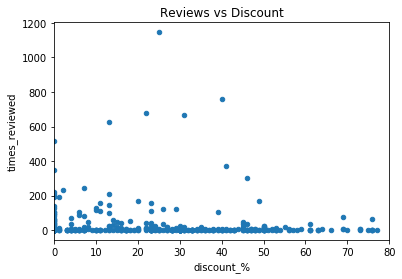

In [21]:
%matplotlib inline
ax1= jumia.plot(x="discount_%", y="times_reviewed", kind="scatter", title="Reviews vs Discount")
ax1.set_xlim(0,80)

Most phones were reviewed at most 50 times, irrespective of their discount rates. A phone's number of reviews (popularity) might depend on other factors not captured in this data, such as its release date. SleekGadgets need not place discount to attract customers; what's more important is relative price.

(0, 400000)

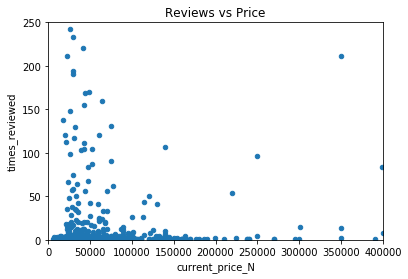

In [22]:
ax2 = jumia.plot(x="current_price_N", y="times_reviewed", kind="scatter", title="Reviews vs Price")
ax2.set_ylim(0,250)
ax2.set_xlim(0,400000)

Phones with the highest number of reviews i.e the popular phones tend to fall with the price range of N10000 - N70000. More expensive phones are not that popular.

### Conclusion

SleekGadgets should launch into the Jumia market by stocking these top 7 brands: Gionee, Huawei, Infinix, Itel, Nokia, Samsung, Tecno. 

In doing so, they should look out for the following specifications:

| Specification | Recommended |
| ------------- | ----------- |
| RAM SIZE | 4GB, 3GB, 6GB, 2GB, 1GB |
| ROM SIZE | **64GB**, **32GB**, 16GB, 128GB |
| SCREEN SIZE | **5.5IN**, 6.3IN, 5.7IN |
| BATTERY CAPACITY (note: many missing values for this column) | 5000MAH, 4000MAH | 

However, note: These conclusions are based on Jumia inventory data alone. When we explore the actual sales, we might get different insights.

### THANK YOU FOR READING!